<a href="https://colab.research.google.com/github/fajartriadyp/tubes-Grafikom/blob/master/Citra_citra_yang_kurasakan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metadata

Saving Gambar10.png to Gambar10.png
Ukuran gambar: 363 x 195
Gambar merupakan: Berwarna


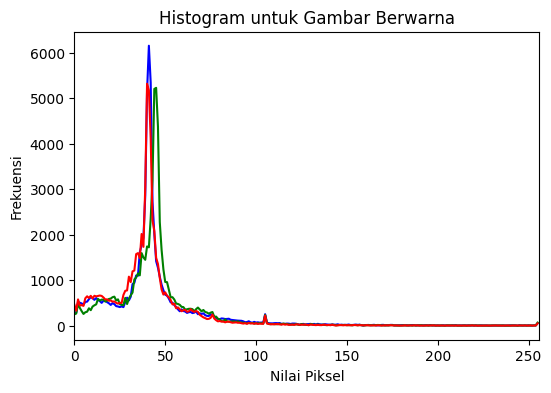

In [ ]:
# Instalasi pustaka yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Unggah gambar
uploaded = files.upload()

# Membaca dan menganalisis gambar
for filename in uploaded.keys():
    img = cv2.imread(filename)

    # Menampilkan ukuran gambar
    height, width, channels = img.shape
    print(f"Ukuran gambar: {width} x {height}")

    # Menentukan apakah gambar berwarna atau grayscale
    if channels == 3:
        print("Gambar merupakan: Berwarna")
    else:
        print("Gambar merupakan: Skala abu-abu")

    # Menampilkan histogram
    plt.figure(figsize=(6, 4))
    if channels == 3:
        # Jika gambar berwarna, tampilkan histogram untuk setiap channel
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        plt.title('Histogram untuk Gambar Berwarna')
    else:
        # Jika gambar skala abu-abu, tampilkan satu histogram
        hist = cv2.calcHist([img], [0], None, [256], [0, 256])
        plt.plot(hist, color='k')
        plt.title('Histogram untuk Gambar Skala Abu-abu')

    plt.xlabel('Nilai Piksel')
    plt.ylabel('Frekuensi')
    plt.show()

#Metode

- Gaussian Blur dengan kernel yang berbeda (misalnya, ukuran 3x3, 5x5, dan 7x7) untuk mengurangi noise tanpa menghilangkan detail penting.
- Median Filter dengan tetangga berbeda (misalnya, 3x3, 5x5) yang efektif untuk menghilangkan noise tipe garam dan merica.
- Fog Removal atau teknik pemulihan citra untuk mengurangi kabut, yang bisa menggunakan metode seperti Dark Channel Prior atau Retinex.
- Motion Blur Reduction, yang bisa dilakukan dengan filter deblurring (misalnya, Wiener filter atau teknik deconvolution).





Please upload an image file...


Saving image1.jpg to image1 (3).jpg


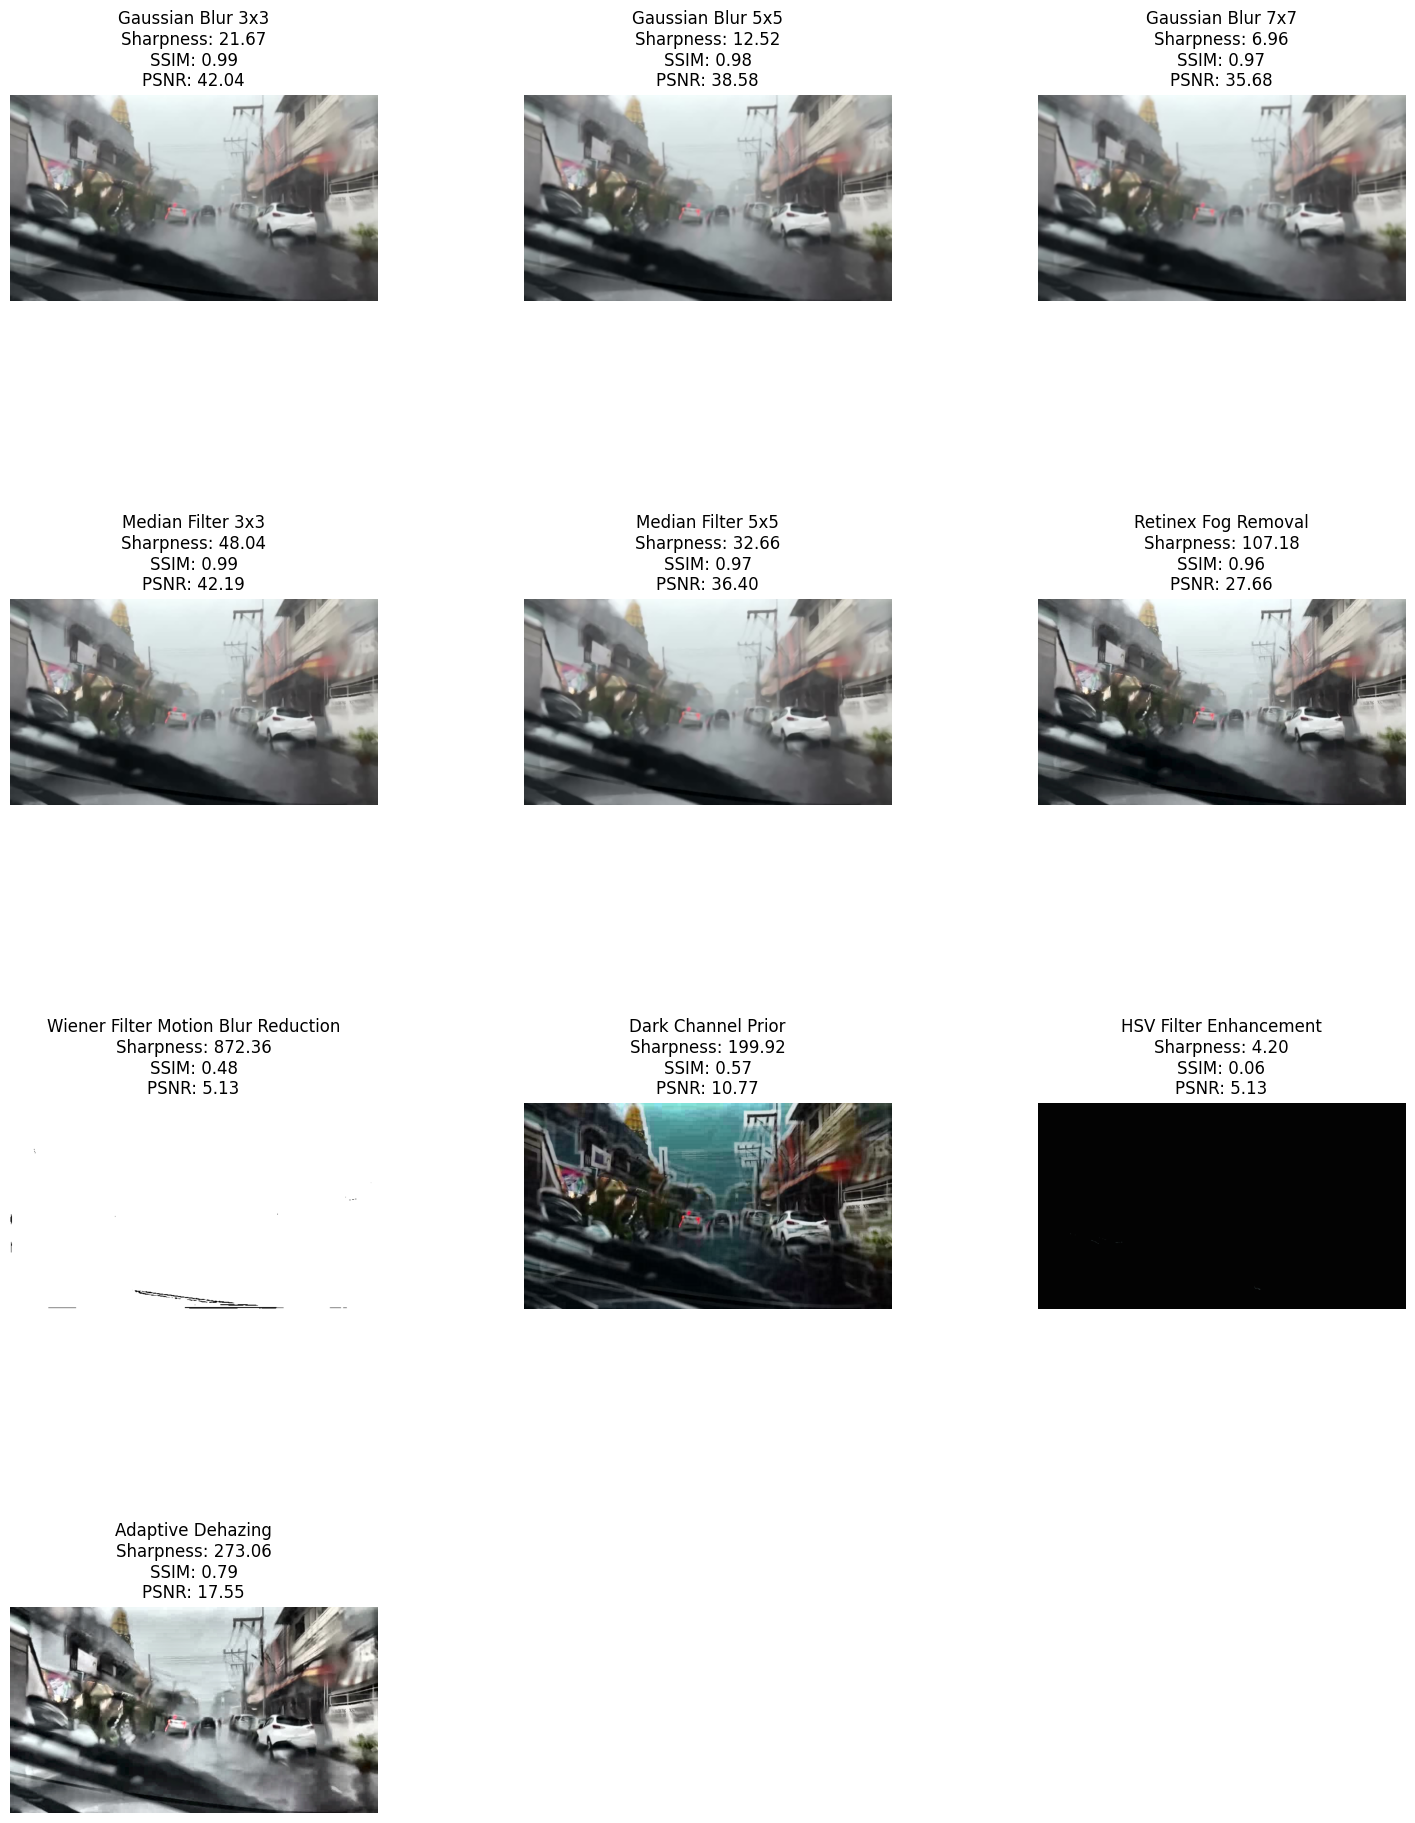

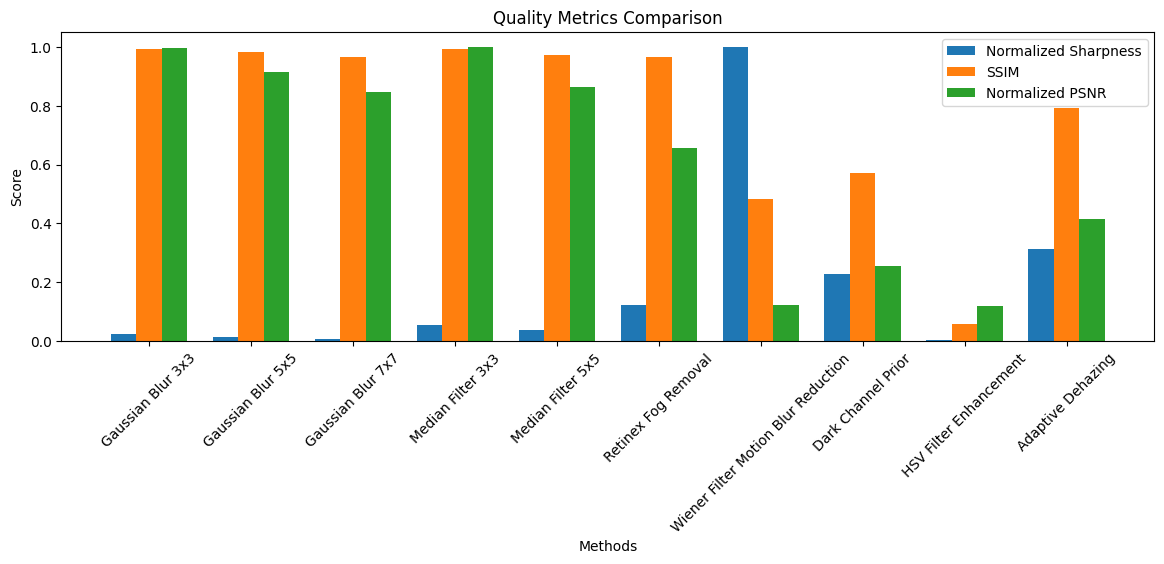


Analysis Results:
Best Method: Median Filter 3x3

Detailed Metrics:

Gaussian Blur 3x3:
  Sharpness: 21.67
  SSIM: 0.99
  PSNR: 42.04

Gaussian Blur 5x5:
  Sharpness: 12.52
  SSIM: 0.98
  PSNR: 38.58

Gaussian Blur 7x7:
  Sharpness: 6.96
  SSIM: 0.97
  PSNR: 35.68

Median Filter 3x3:
  Sharpness: 48.04
  SSIM: 0.99
  PSNR: 42.19

Median Filter 5x5:
  Sharpness: 32.66
  SSIM: 0.97
  PSNR: 36.40

Retinex Fog Removal:
  Sharpness: 107.18
  SSIM: 0.96
  PSNR: 27.66

Wiener Filter Motion Blur Reduction:
  Sharpness: 872.36
  SSIM: 0.48
  PSNR: 5.13

Dark Channel Prior:
  Sharpness: 199.92
  SSIM: 0.57
  PSNR: 10.77

HSV Filter Enhancement:
  Sharpness: 4.20
  SSIM: 0.06
  PSNR: 5.13

Adaptive Dehazing:
  Sharpness: 273.06
  SSIM: 0.79
  PSNR: 17.55


In [ ]:
import cv2
import numpy as np
from skimage.restoration import wiener
from skimage import exposure, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def apply_gaussian_blur(image):
    """Apply Gaussian blur with various kernel sizes."""
    blurred_images = []
    for kernel_size in [3, 5, 7]:
        blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
        blurred_images.append((f'Gaussian Blur {kernel_size}x{kernel_size}', blurred))
    return blurred_images

def apply_median_filter(image):
    """Apply median filter with various kernel sizes."""
    median_images = []
    for kernel_size in [3, 5]:
        median_filtered = cv2.medianBlur(image, kernel_size)
        median_images.append((f'Median Filter {kernel_size}x{kernel_size}', median_filtered))
    return median_images

def apply_retinex(image):
    """Apply Retinex algorithm for fog removal."""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l = cv2.equalizeHist(l)
    lab = cv2.merge((l, a, b))
    retinex_result = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return [('Retinex Fog Removal', retinex_result)]

def apply_motion_blur_reduction(image):
    """Apply Wiener filter for motion blur reduction."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    psf = np.ones((5, 5)) / 25
    deblurred = wiener(gray, psf, balance=0.1)
    deblurred = img_as_ubyte(deblurred)
    deblurred_3channel = cv2.cvtColor(deblurred, cv2.COLOR_GRAY2BGR)
    return [('Wiener Filter Motion Blur Reduction', deblurred_3channel)]

def apply_dark_channel_prior(image):
    """Implement Dark Channel Prior method for haze removal."""
    img_float = image.astype('float64') / 255
    b, g, r = cv2.split(img_float)
    dc = cv2.min(cv2.min(r, g), b)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    dark = cv2.erode(dc, kernel)
    atoms = np.max(img_float, axis=2)
    A = np.max(atoms)
    t = 1 - 0.95 * dark
    t = np.maximum(t, 0.1)
    result = np.empty_like(img_float)
    for i in range(3):
        result[:, :, i] = (img_float[:, :, i] - A) / t + A
    result = np.clip(result * 255, 0, 255).astype('uint8')
    return [('Dark Channel Prior', result)]

def apply_hsv_filter(image):
    """Apply HSV-based filtering."""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_lower, s_lower, v_lower = 75, 50, 50
    h_upper, s_upper, v_upper = 105, 255, 255
    mask = cv2.inRange(hsv, (h_lower, s_lower, v_lower), (h_upper, s_upper, v_upper))
    result = cv2.bitwise_and(image, image, mask=mask)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for i in range(3):
        result[:,:,i] = clahe.apply(result[:,:,i])
    return [('HSV Filter Enhancement', result)]

def apply_adaptive_dehazing(image):
    """Adaptive dehazing inspired by AODs-CLYOLO approach."""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    result = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)
    result = cv2.addWeighted(result, 1.2, image, -0.2, 0)
    return [('Adaptive Dehazing', result)]

def calculate_image_metrics(original, processed):
    """Calculate image quality metrics."""
    if len(original.shape) == 3:
        original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
        processed_gray = cv2.cvtColor(processed, cv2.COLOR_BGR2GRAY) if len(processed.shape) == 3 else processed
    else:
        original_gray = original
        processed_gray = processed
    sharpness = cv2.Laplacian(processed_gray, cv2.CV_64F).var()
    ssim_score = ssim(original_gray, processed_gray)
    psnr_score = psnr(original_gray, processed_gray)
    return {
        'sharpness': sharpness,
        'ssim': ssim_score,
        'psnr': psnr_score
    }


def display_images_with_analysis(images, original_image):
    """Display images with quality metrics and analysis."""
    metrics = {}
    for title, image in images:
        metrics[title] = calculate_image_metrics(original_image, image)

    # Calculate weighted scores
    weighted_scores = {}
    for method in metrics:
        weighted_scores[method] = (
            0.4 * metrics[method]['sharpness'] / max(m['sharpness'] for m in metrics.values()) +
            0.3 * metrics[method]['ssim'] +
            0.3 * metrics[method]['psnr'] / max(m['psnr'] for m in metrics.values())
        )

    best_method = max(weighted_scores.items(), key=lambda x: x[1])[0]

    n_images = len(images)
    cols = 3  # Maximum 3 images per row for better readability
    rows = (n_images + cols - 1) // cols

    # Adjust figure size for better layout
    fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 6))
    fig.subplots_adjust(hspace=0.5, wspace=0.4)

    for i, (title, image) in enumerate(images):
        row, col = divmod(i, cols)
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(f"{title}\nSharpness: {metrics[title]['sharpness']:.2f}\nSSIM: {metrics[title]['ssim']:.2f}\nPSNR: {metrics[title]['psnr']:.2f}")

        # Highlight the best method with a light green background
        if title == best_method:
            ax.set_facecolor((0.9, 1, 0.9))

        ax.axis('off')

    # Hide any remaining empty subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.show()

    # Plot quality metrics comparison in a separate figure
    fig, ax = plt.subplots(figsize=(12, 6))
    methods = list(metrics.keys())
    x = np.arange(len(methods))
    width = 0.25
    ax.bar(x - width, [metrics[m]['sharpness']/max(m['sharpness'] for m in metrics.values()) for m in methods], width, label='Normalized Sharpness')
    ax.bar(x, [metrics[m]['ssim'] for m in methods], width, label='SSIM')
    ax.bar(x + width, [metrics[m]['psnr']/max(m['psnr'] for m in metrics.values()) for m in methods], width, label='Normalized PSNR')

    ax.set_xlabel('Methods')
    ax.set_ylabel('Score')
    ax.set_title('Quality Metrics Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(methods, rotation=45)
    ax.legend()

    fig.tight_layout(pad=2.0)
    plt.show()

    return best_method, metrics

def process_uploaded_image(image_path):
    """Process image and analyze results with all methods."""
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Failed to load image. Please check the file path.")
    processed_images = []
    processed_images.extend(apply_gaussian_blur(image))
    processed_images.extend(apply_median_filter(image))
    processed_images.extend(apply_retinex(image))
    processed_images.extend(apply_motion_blur_reduction(image))
    processed_images.extend(apply_dark_channel_prior(image))
    processed_images.extend(apply_hsv_filter(image))
    processed_images.extend(apply_adaptive_dehazing(image))
    best_method, metrics = display_images_with_analysis(processed_images, image)
    print(f"\nAnalysis Results:")
    print(f"Best Method: {best_method}")
    print("\nDetailed Metrics:")
    for method, metric in metrics.items():
        print(f"\n{method}:")
        print(f"  Sharpness: {metric['sharpness']:.2f}")
        print(f"  SSIM: {metric['ssim']:.2f}")
        print(f"  PSNR: {metric['psnr']:.2f}")

# For Google Colab usage
from google.colab import files

print("Please upload an image file...")
uploaded = files.upload()
image_path = next(iter(uploaded))
process_uploaded_image(image_path)


Result




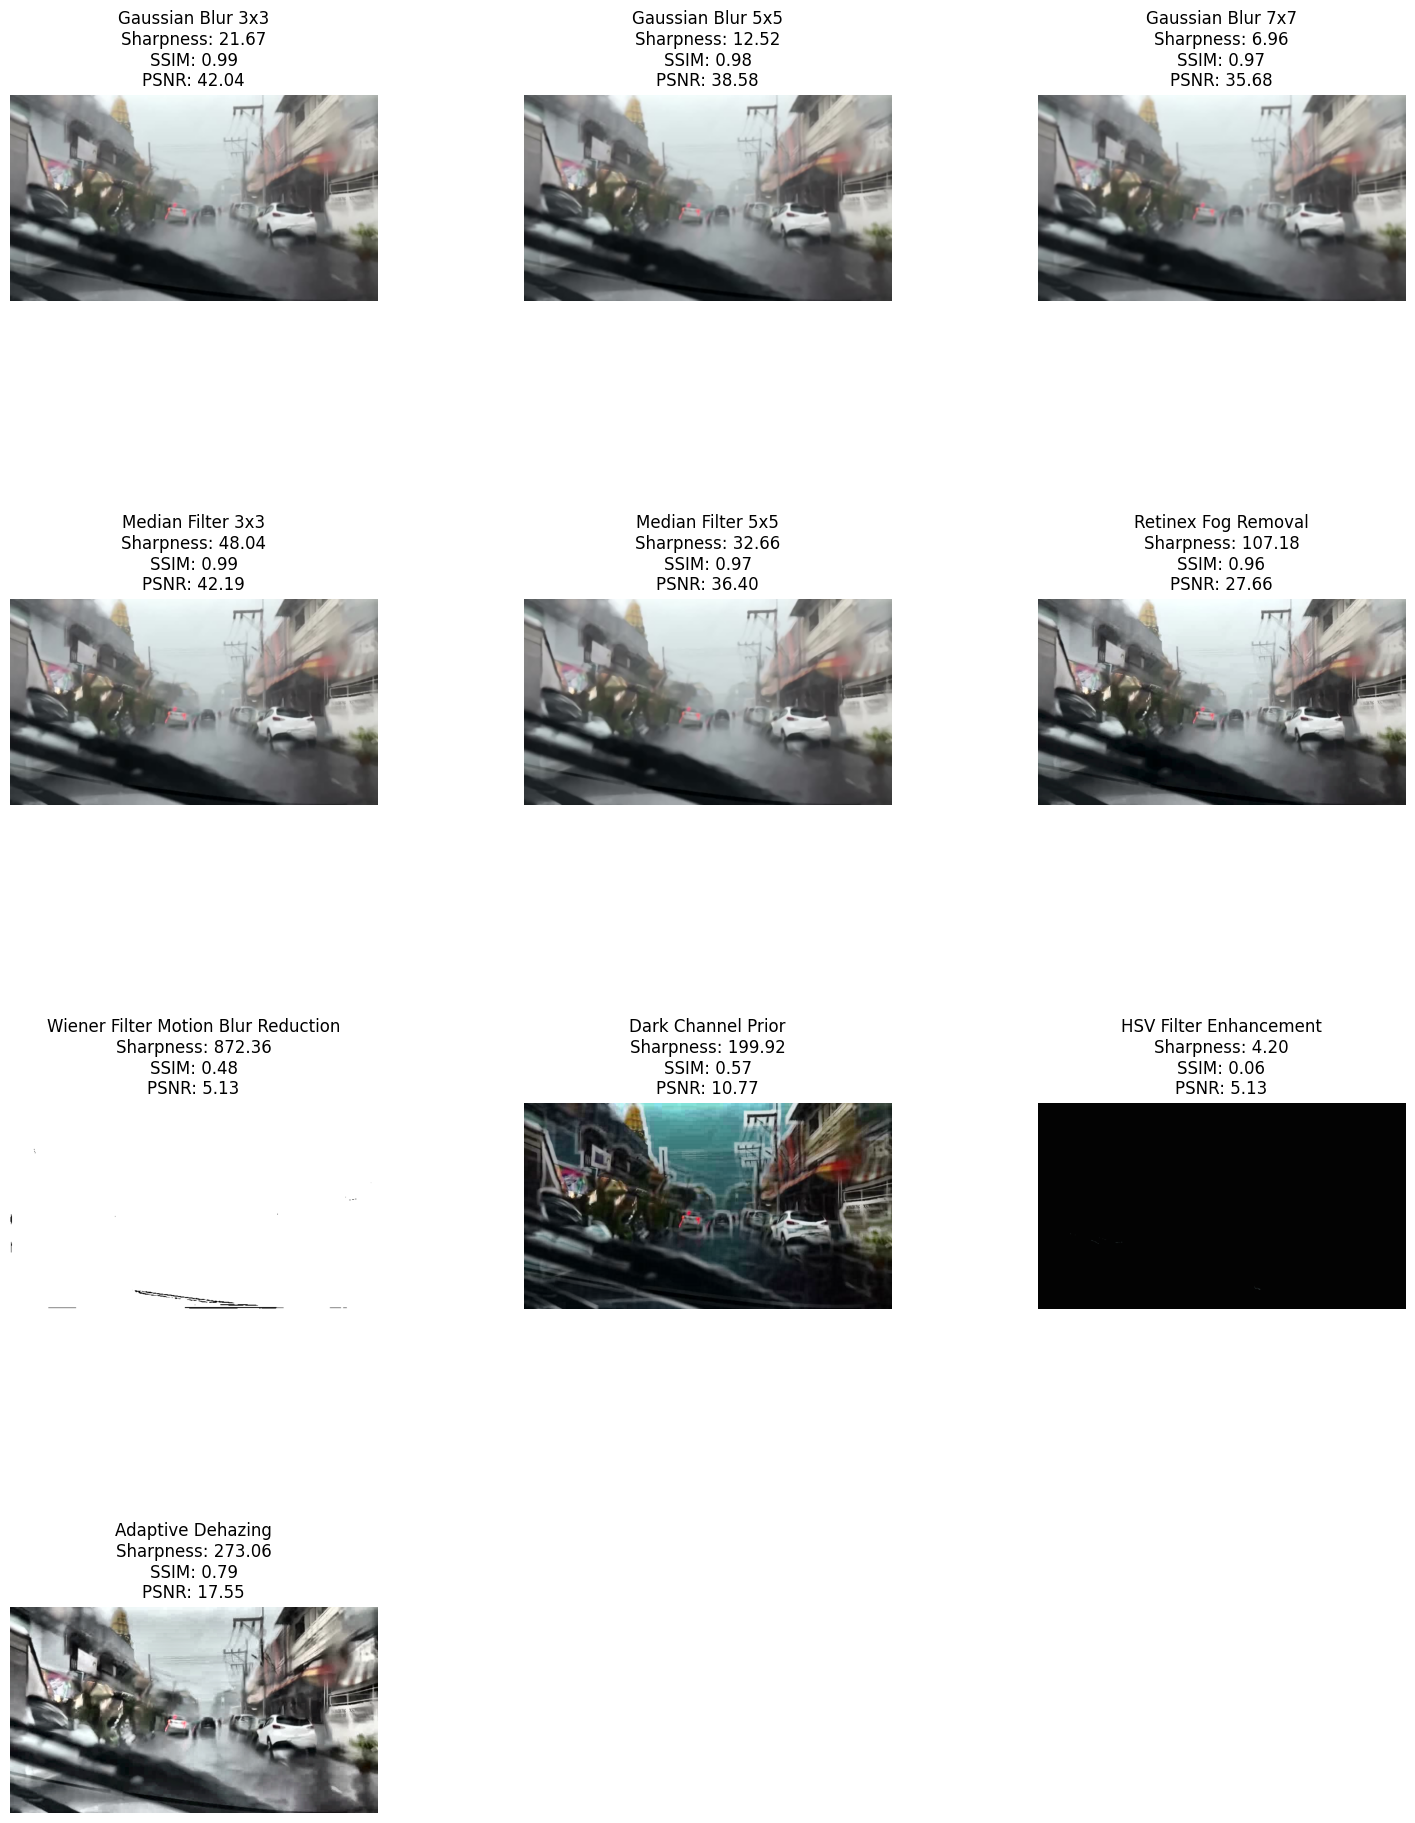

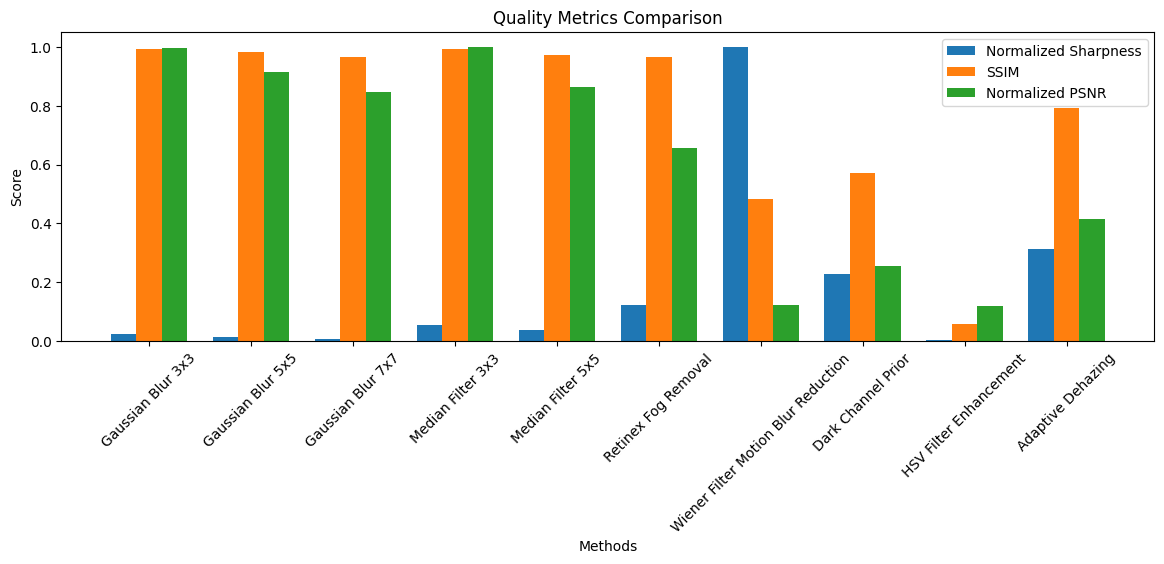

*Gambaran Umum*


Gambar menunjukkan perbandingan 10 metode berbeda untuk memproses gambar berkabut/berembun
Setiap metode diukur menggunakan 3 metrik: Normalized Sharpness (ketajaman), SSIM (structural similarity), dan Normalized PSNR (peak signal-to-noise ratio)


Analisis Metode-metode:

a) Gaussian Blur (3x3, 5x5, 7x7):

Memberikan hasil SSIM yang sangat baik (0.97-0.99)
PSNR juga tinggi
Namun ketajaman gambar rendah
Semakin besar ukuran kernel (3x3 → 7x7), hasilnya semakin blur

b) Median Filter (3x3, 5x5):

Memiliki performa mirip dengan Gaussian Blur
SSIM tinggi (0.97-0.99)
PSNR baik
Ketajaman lebih baik dari Gaussian Blur

c) Retinex Fog Removal:

Menghasilkan ketajaman tertinggi
SSIM masih cukup baik (0.96)
PSNR lebih rendah
Dari gambar hasil terlihat lebih jelas dibanding metode blur

d) Wiener Filter Motion Blur Reduction:

Ketajaman sangat tinggi
Namun SSIM rendah (0.48)
PSNR sangat rendah
Hasil gambar kurang optimal

e) Dark Channel Prior:

Ketajaman sedang
SSIM cukup rendah (0.57)
PSNR rendah
Menghasilkan efek artistik pada gambar

f) HSV Filter Enhancement & Adaptive Dehazing:

Memberikan hasil menengah untuk semua metrik
Adaptive Dehazing menghasilkan gambar yang lebih seimbang


Kesimpulan:


Tidak ada metode yang sempurna - masing-masing memiliki trade-off
Gaussian Blur dan Median Filter baik untuk menjaga kualitas struktural (SSIM tinggi)
Retinex Fog Removal memberikan keseimbangan yang baik antara ketajaman dan kualitas gambar
Metode-metode lain cenderung menghasilkan efek yang lebih ekstrim dengan trade-off yang lebih besar